In [66]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [67]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [68]:
import os
import pandas as pd
import numpy as np
import random
import torch

def reset_seeds(seed=42):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [69]:
DATA_PATH = "/content/data/MyDrive/SKN 10기/강의/2차 단위 프로젝트/"
df = pd.read_csv(DATA_PATH+"customer_churn_telecom_services.csv")

In [70]:
df.shape, df.columns

((7043, 20),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

In [71]:
df.columns = [col.lower() for col in df.columns] # 컬럼명 소문자로 변환
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [76]:
df.describe(include="all")

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [77]:
df.describe(include=np.number)

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [78]:
df.describe(exclude=np.number)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [79]:
new_churn = pd.Categorical(df["churn"])
new_churn = new_churn.rename_categories(["unchurn","churn"])

new_churn.describe()

,counts,freqs
categories,,
unchurn,5174,0.73463
churn,1869,0.26537


In [80]:
(df.isnull().sum() / df.shape[0]).round(4)\
  .sort_values(ascending=False) # 각 걸럼별 결측치 비율

,0
totalcharges,0.0016
gender,0.0000
seniorcitizen,0.0000
monthlycharges,0.0000
paymentmethod,0.0000
paperlessbilling,0.0000
contract,0.0000
streamingmovies,0.0000
streamingtv,0.0000
techsupport,0.0000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

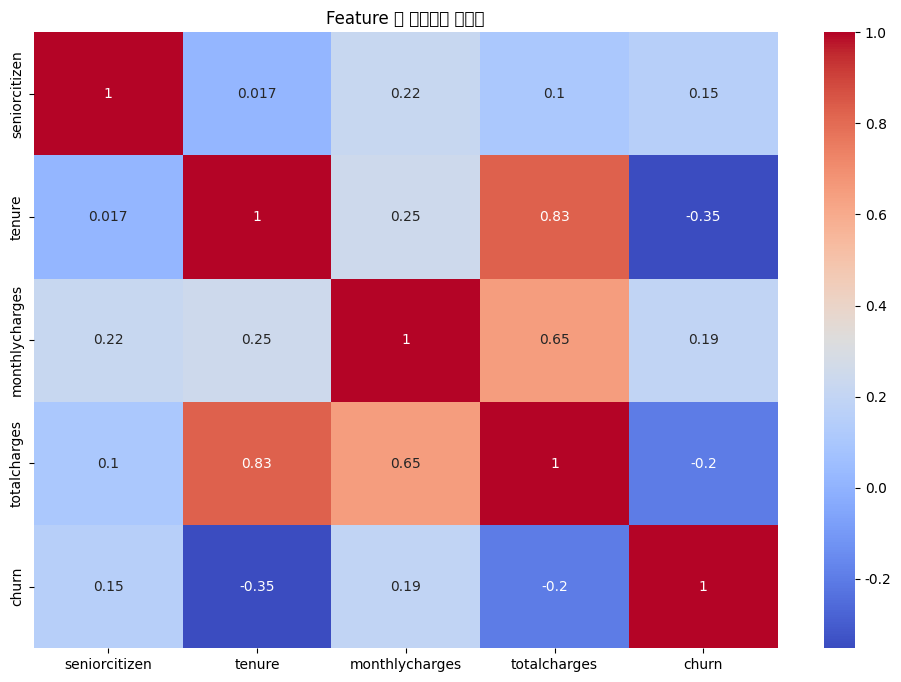

churn과 각 feature 간의 상관계수:
churn             1.000000
monthlycharges    0.193356
seniorcitizen     0.150889
totalcharges     -0.199484
tenure           -0.352229
Name: churn, dtype: float64


In [81]:
# 만약 Churn 컬럼이 문자열이면 Label Encoding
if df['churn'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['churn'] = le.fit_transform(df['churn'])

# 상관관계 행렬 계산
corr_matrix = df.select_dtypes(include=['number']).corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature 간 상관관계 히트맵")
plt.show()

# Churn과 다른 feature들의 상관계수 출력
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
print("churn과 각 feature 간의 상관계수:")
print(churn_corr)

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 1️⃣ Label Encoding (순서가 있는 범주형 변수)
label_cols = ['gender', 'contract']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# 2️⃣ One-Hot Encoding (순서가 없는 범주형 변수)
df = pd.get_dummies(df, columns=['internetservice', 'paymentmethod', 'multiplelines'], drop_first=True)

# 3️⃣ Scaling (숫자형 변수 변환)
scaler_minmax = MinMaxScaler()  # 정규화 (0~1)

# MinMaxScaler 적용할 컬럼
minmax_cols = ['tenure','monthlycharges', 'totalcharges']
df[minmax_cols] = scaler_minmax.fit_transform(df[minmax_cols])

In [83]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
0,0,0,Yes,No,0.013889,No,No,Yes,No,No,...,0.115423,0.001275,0,False,False,False,True,False,True,False
1,1,0,No,No,0.472222,Yes,Yes,No,Yes,No,...,0.385075,0.215867,0,False,False,False,False,True,False,False
2,1,0,No,No,0.027778,Yes,Yes,Yes,No,No,...,0.354229,0.010310,1,False,False,False,False,True,False,False
3,1,0,No,No,0.625000,No,Yes,No,Yes,Yes,...,0.239303,0.210241,0,False,False,False,False,False,True,False
4,0,0,No,No,0.027778,Yes,No,No,No,No,...,0.521891,0.015330,1,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,0.333333,Yes,Yes,No,Yes,Yes,...,0.662189,0.227521,0,False,False,False,False,True,False,True
7039,0,0,Yes,Yes,1.000000,Yes,No,Yes,Yes,No,...,0.845274,0.847461,0,True,False,True,False,False,False,True
7040,0,0,Yes,Yes,0.152778,No,Yes,No,No,No,...,0.112935,0.037809,0,False,False,False,True,False,True,False
7041,1,1,Yes,No,0.055556,Yes,No,No,No,No,...,0.558706,0.033210,1,True,False,False,False,True,False,True


In [84]:
df.describe(include="all")

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
count,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,...,7043.000000,7032.000000,7043.000000,7043,7043,7043,7043,7043,7043,7043
unique,NaN,NaN,2,2,NaN,2,3,3,3,3,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,No,No,NaN,Yes,No,No,No,No,...,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,3641,4933,NaN,6361,3498,3088,3095,3473,...,NaN,NaN,NaN,3947,5517,5521,4678,5431,6361,4072
mean,0.504756,0.162147,NaN,NaN,0.449599,NaN,NaN,NaN,NaN,NaN,...,0.462803,0.261309,0.265370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.500013,0.368612,NaN,NaN,0.341104,NaN,NaN,NaN,NaN,NaN,...,0.299403,0.261571,0.441561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,0.125000,NaN,NaN,NaN,NaN,NaN,...,0.171642,0.044155,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,NaN,NaN,0.402778,NaN,NaN,NaN,NaN,NaN,...,0.518408,0.159090,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,0.000000,NaN,NaN,0.763889,NaN,NaN,NaN,NaN,NaN,...,0.712438,0.435719,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   seniorcitizen                          7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   float64
 5   phoneservice                           7043 non-null   object 
 6   onlinesecurity                         7043 non-null   object 
 7   onlinebackup                           7043 non-null   object 
 8   deviceprotection                       7043 non-null   object 
 9   techsupport                            7043 non-null   object 
 10  streamingtv                            7043 non-null   object 
 11  stre

In [86]:
binary_cols = ['partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup',
               'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [87]:
df.shape

(7043, 24)

In [88]:
df['churn'] = df['churn'].astype(int)

In [89]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
0,0,0,1,0,0.013889,0,0.0,1.0,0.0,0.0,...,0.115423,0.001275,0,False,False,False,True,False,True,False
1,1,0,0,0,0.472222,1,1.0,0.0,1.0,0.0,...,0.385075,0.215867,0,False,False,False,False,True,False,False
2,1,0,0,0,0.027778,1,1.0,1.0,0.0,0.0,...,0.354229,0.010310,1,False,False,False,False,True,False,False
3,1,0,0,0,0.625000,0,1.0,0.0,1.0,1.0,...,0.239303,0.210241,0,False,False,False,False,False,True,False
4,0,0,0,0,0.027778,1,0.0,0.0,0.0,0.0,...,0.521891,0.015330,1,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1.0,0.0,1.0,1.0,...,0.662189,0.227521,0,False,False,False,False,True,False,True
7039,0,0,1,1,1.000000,1,0.0,1.0,1.0,0.0,...,0.845274,0.847461,0,True,False,True,False,False,False,True
7040,0,0,1,1,0.152778,0,1.0,0.0,0.0,0.0,...,0.112935,0.037809,0,False,False,False,True,False,True,False
7041,1,1,1,0,0.055556,1,0.0,0.0,0.0,0.0,...,0.558706,0.033210,1,True,False,False,False,True,False,True


In [90]:
# bool 타입인 컬럼만 선택해서 int로 변환
bool_obj_cols = df.select_dtypes(include=['bool', 'object']).columns
df[bool_obj_cols] = df[bool_obj_cols].astype(int)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   seniorcitizen                          7043 non-null   int64  
 2   partner                                7043 non-null   int64  
 3   dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   phoneservice                           7043 non-null   int64  
 6   onlinesecurity                         5517 non-null   float64
 7   onlinebackup                           5517 non-null   float64
 8   deviceprotection                       5517 non-null   float64
 9   techsupport                            5517 non-null   float64
 10  streamingtv                            5517 non-null   float64
 11  stre

In [92]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
0,0,0,1,0,0.013889,0,0.0,1.0,0.0,0.0,...,0.115423,0.001275,0,0,0,0,1,0,1,0
1,1,0,0,0,0.472222,1,1.0,0.0,1.0,0.0,...,0.385075,0.215867,0,0,0,0,0,1,0,0
2,1,0,0,0,0.027778,1,1.0,1.0,0.0,0.0,...,0.354229,0.010310,1,0,0,0,0,1,0,0
3,1,0,0,0,0.625000,0,1.0,0.0,1.0,1.0,...,0.239303,0.210241,0,0,0,0,0,0,1,0
4,0,0,0,0,0.027778,1,0.0,0.0,0.0,0.0,...,0.521891,0.015330,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1.0,0.0,1.0,1.0,...,0.662189,0.227521,0,0,0,0,0,1,0,1
7039,0,0,1,1,1.000000,1,0.0,1.0,1.0,0.0,...,0.845274,0.847461,0,1,0,1,0,0,0,1
7040,0,0,1,1,0.152778,0,1.0,0.0,0.0,0.0,...,0.112935,0.037809,0,0,0,0,1,0,1,0
7041,1,1,1,0,0.055556,1,0.0,0.0,0.0,0.0,...,0.558706,0.033210,1,1,0,0,0,1,0,1


In [93]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
0,0,0,1,0,0.013889,0,0.0,1.0,0.0,0.0,...,0.115423,0.001275,0,0,0,0,1,0,1,0
1,1,0,0,0,0.472222,1,1.0,0.0,1.0,0.0,...,0.385075,0.215867,0,0,0,0,0,1,0,0
2,1,0,0,0,0.027778,1,1.0,1.0,0.0,0.0,...,0.354229,0.010310,1,0,0,0,0,1,0,0
3,1,0,0,0,0.625000,0,1.0,0.0,1.0,1.0,...,0.239303,0.210241,0,0,0,0,0,0,1,0
4,0,0,0,0,0.027778,1,0.0,0.0,0.0,0.0,...,0.521891,0.015330,1,1,0,0,1,0,0,0


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,multiplelines_No phone service,multiplelines_Yes
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.017990,-0.014025,0.000232,-0.008620,...,-0.014569,0.000048,-0.008612,-0.011286,0.006026,0.001215,0.000752,0.013744,0.006488,-0.008414
seniorcitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.110473,-0.003577,-0.011482,-0.135584,...,0.220173,0.102411,0.150889,0.255338,-0.182742,-0.024135,0.171718,-0.153477,-0.008576,0.142948
partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.171751,0.173251,0.188201,0.144218,...,0.096848,0.319072,-0.150448,0.000304,0.000615,0.082029,-0.083852,-0.095125,-0.017706,0.142057
dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.158531,0.097615,0.085130,0.137187,...,-0.113890,0.064653,-0.164221,-0.165818,0.139812,0.060267,-0.150642,0.059071,0.001762,-0.024526
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.376008,0.421591,0.421932,0.372711,...,0.247900,0.825880,-0.352229,0.019720,-0.039062,0.233006,-0.208363,-0.233852,-0.008448,0.331941
phoneservice,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.038202,0.014718,-0.006211,-0.041421,...,0.247398,0.113008,0.011942,0.289999,0.172209,-0.007721,0.003062,-0.003319,-1.000000,0.279690
onlinesecurity,-0.017990,-0.110473,0.171751,0.158531,0.376008,-0.038202,1.000000,0.179711,0.170336,0.273472,...,0.069118,0.331783,-0.280816,-0.222942,NaN,0.139147,-0.238899,0.036377,0.038202,0.033068
onlinebackup,-0.014025,-0.003577,0.173251,0.097615,0.421591,0.014718,0.179711,1.000000,0.185155,0.190586,...,0.252337,0.431750,-0.196061,-0.014784,NaN,0.111494,-0.128257,-0.072580,-0.014718,0.147321
deviceprotection,0.000232,-0.011482,0.188201,0.085130,0.421932,-0.006211,0.170336,0.185155,1.000000,0.235716,...,0.321927,0.446978,-0.177125,-0.001593,NaN,0.136839,-0.131386,-0.091530,0.006211,0.146150
techsupport,-0.008620,-0.135584,0.144218,0.137187,0.372711,-0.041421,0.273472,0.190586,0.235716,1.000000,...,0.134233,0.354257,-0.274422,-0.212560,NaN,0.141165,-0.242996,0.031191,0.041421,0.035303


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

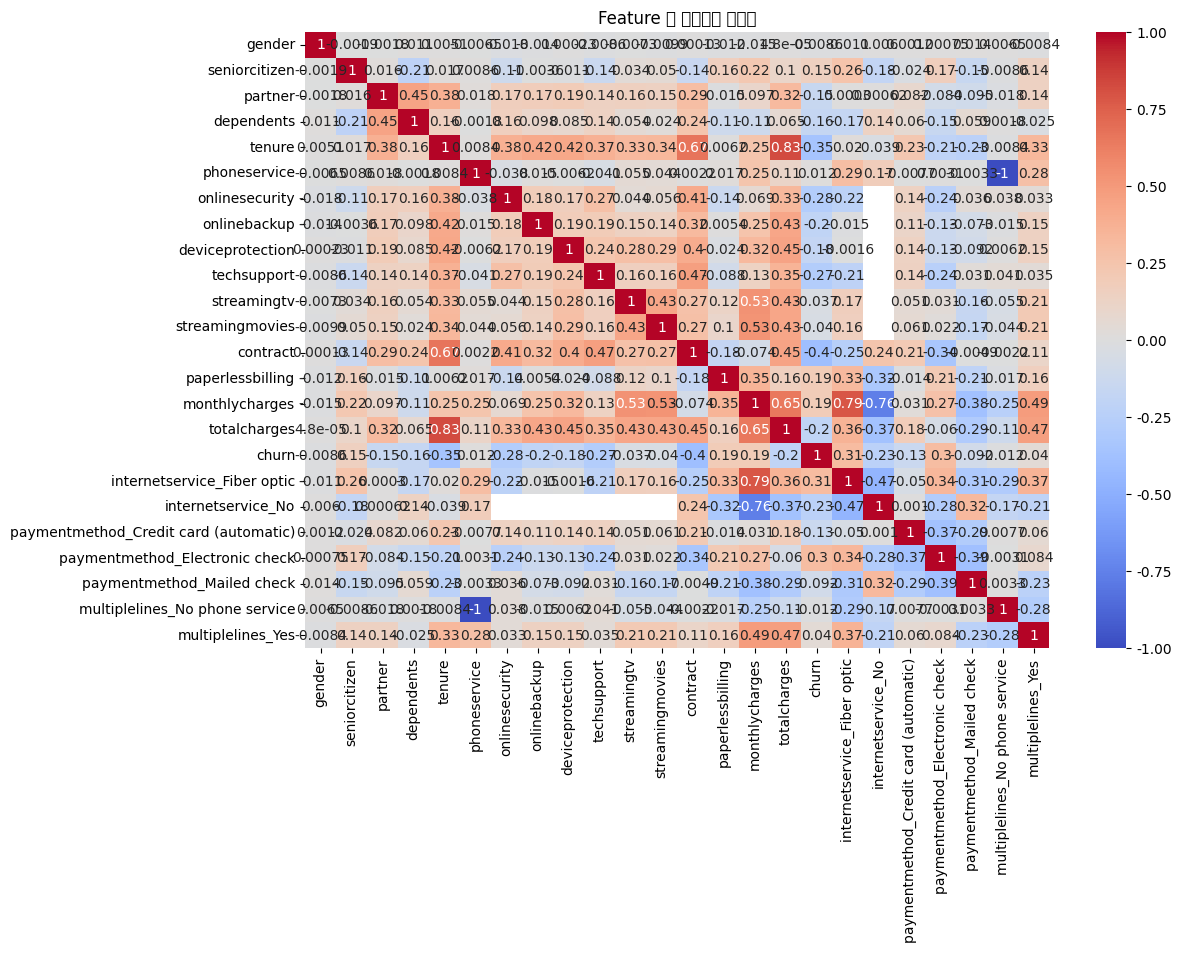

churn과 각 feature 간의 상관계수:
churn                                    1.000000
internetservice_Fiber optic              0.308020
paymentmethod_Electronic check           0.301919
monthlycharges                           0.193356
paperlessbilling                         0.191825
seniorcitizen                            0.150889
multiplelines_Yes                        0.040102
phoneservice                             0.011942
gender                                  -0.008612
multiplelines_No phone service          -0.011942
streamingtv                             -0.037057
streamingmovies                         -0.040132
paymentmethod_Mailed check              -0.091683
paymentmethod_Credit card (automatic)   -0.134302
partner                                 -0.150448
dependents                              -0.164221
deviceprotection                        -0.177125
onlinebackup                            -0.196061
totalcharges                            -0.199484
internetservice_No      

In [96]:
# 상관관계 행렬 계산
corr_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature 간 상관관계 히트맵")
plt.show()

# Churn과 다른 feature들의 상관계수 출력
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
print("churn과 각 feature 간의 상관계수:")
print(churn_corr)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
y = df['churn']
X = df.drop(['churn'], axis=1)

In [100]:
reset_seeds()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=df['churn'])

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((5634, 23), (1409, 23), (5634,), (1409,))

# Base ModelV0

In [101]:
train = X_tr.copy()
test = X_te.copy()

train.shape, test.shape

((5634, 23), (1409, 23))

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int64  
 1   seniorcitizen                          5634 non-null   int64  
 2   partner                                5634 non-null   int64  
 3   dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   float64
 5   phoneservice                           5634 non-null   int64  
 6   onlinesecurity                         4420 non-null   float64
 7   onlinebackup                           4420 non-null   float64
 8   deviceprotection                       4420 non-null   float64
 9   techsupport                            4420 non-null   float64
 10  streamingtv                            4420 non-null   float64
 11  stream

In [104]:
train.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
onlinesecurity,1214
onlinebackup,1214
deviceprotection,1214
techsupport,1214


In [105]:
test.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
onlinesecurity,312
onlinebackup,312
deviceprotection,312
techsupport,312


In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
reset_seeds()

modelV0 = DecisionTreeClassifier()

print(f'{X_tr} / {y_tr.shape}')
modelV0.fit(X_tr, y_tr)

      gender  seniorcitizen  partner  dependents    tenure  phoneservice  \
3738       1              0        0           0  0.486111             0   
3151       1              0        1           1  0.208333             1   
4860       1              0        1           1  0.180556             0   
3867       0              0        1           0  0.361111             1   
3810       1              0        1           1  0.013889             1   
...      ...            ...      ...         ...       ...           ...   
6303       0              0        1           0  0.986111             1   
6227       1              0        0           0  0.027778             1   
4673       0              1        0           0  0.347222             1   
2710       0              0        1           0  0.333333             1   
5639       1              0        0           0  0.083333             1   

      onlinesecurity  onlinebackup  deviceprotection  techsupport  ...  \
3738         

DecisionTreeClassifier()

In [108]:
reset_seeds()

score_tr = modelV0.score(X_tr, y_tr)
score_te = modelV0.score(X_te, y_te)

score_tr, score_te

(0.9976925807596734, 0.7281760113555713)

In [109]:
from sklearn.metrics import roc_curve, auc

y_pred = modelV0.predict_proba(X_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te, y_pred)

auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.65849285695833


In [110]:
df_feature_importances = pd.DataFrame(modelV0.feature_importances_, X_tr.columns).sort_values(by=[0], ascending=False).reset_index()

print(f'{df_feature_importances.shape}')
df_feature_importances

(23, 2)


,index,0
0,monthlycharges,0.192578
1,totalcharges,0.189322
2,contract,0.169882
3,tenure,0.133241
4,internetservice_Fiber optic,0.053366
5,gender,0.028641
6,paperlessbilling,0.023885
7,paymentmethod_Electronic check,0.022605
8,techsupport,0.021809
9,onlinebackup,0.021525
